# init

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
from pymfe.mfe import MFE
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn import svm
import sklearn.metrics as skm
from sklearn import metrics
import pdb
import random

stdTable = "./data/recommender/std-table.csv"
path_arff = "./data/datasets/arff/"
path_index = "./data/index/arff/"
# files_arff = os.listdir(path_arff)

path = "./data/experimento/datasets/selected/cleaned/"
tablePath = savePath = "./data/recommender/meta-features.csv"

metaTablePath = "./metafeatures/meta-table.csv"

ccTable = "./metafeatures/meta-table-CC.csv"
accTable = "./metafeatures/meta-table-ACC.csv"
smmTable = "./metafeatures/meta-table-SMM.csv"
hdyTable = "./metafeatures/meta-table-HDy.csv"
dysTable = "./metafeatures/meta-table-DyS.csv"
sordTable = "./metafeatures/meta-table-SORD.csv"
msTable = "./metafeatures/meta-table-MS.csv"
# ms2Table = "./metafeatures/meta-table-MS2.csv"
maxTable = "./metafeatures/meta-table-MAX.csv"
xTable = "./metafeatures/meta-table-X.csv"
t50Table = "./metafeatures/meta-table-T50.csv"

algList = ["CC","ACC","SMM","HDy","DyS","SORD","MS","MAX","X","T50"]
pathList = [ccTable, accTable, smmTable, hdyTable, dysTable, sordTable, msTable, maxTable, xTable, t50Table]

datasets_path = './datasets/'
files = os.listdir(datasets_path)

# preprocess

In [2]:
meta_table = pd.read_csv(metaTablePath)
arr_table = meta_table.drop(columns=meta_table.columns.tolist()[110::-1])
meta_table.drop(columns=meta_table.columns.tolist()[111::], inplace=True)
X = meta_table.values

In [3]:
# alg_list = ['arr_PACC', 'arr_PCC', 'arr_MS2']
# arr_table.drop(columns=alg_list, inplace=True)
arr_table

,arr_CC,arr_ACC,arr_SMM,arr_HDy,arr_DyS,arr_SORD,arr_MS,arr_MAX,arr_X,arr_T50
0,0.929335,1.080170,1.133541,1.047834,1.129099,1.130013,1.116099,1.125441,1.124526,0.576515
1,1.039664,1.113322,1.120367,1.050265,1.117221,1.117358,1.124744,1.122624,1.113322,0.607426
2,0.852562,1.076695,1.173932,1.120261,1.180756,1.177869,1.158185,1.162056,1.163959,0.579352
3,0.750319,1.047041,1.237807,1.075554,1.278497,1.277477,1.215711,1.257642,1.272226,0.653186
4,0.923822,0.995252,1.224344,0.819903,0.933007,1.187376,1.104864,1.134544,1.245295,0.683343
...,...,...,...,...,...,...,...,...,...,...
128,1.073189,1.083507,1.086012,1.075992,1.089054,1.087205,1.086847,1.083567,1.083626,0.519084
129,1.083320,1.081324,1.081793,1.075806,1.084552,1.083085,1.082087,1.082204,1.079446,0.509502
130,1.047559,1.095438,1.098946,1.072114,1.107131,1.105100,1.101161,1.094823,1.096977,0.538239
131,1.077442,1.085586,1.087981,1.074807,1.088520,1.090077,1.089358,1.085586,1.087202,0.521486


In [4]:
instance_len = len(X)
knn = NearestNeighbors(n_neighbors=5)
ranking_table = pd.DataFrame(columns=arr_table.columns)

for i in range(0, instance_len):
   X_train = np.delete(X, i, 0)
   X_test = [X[i]]

   knn.fit(X_train)
   neighbors = knn.kneighbors(X=X_test)
   
   dt = 0
   for dist in neighbors[0].tolist()[0]:
      if dist == 0.0: ################################## GAMBIARRA ABSURDA -> CORRIGIR DEPOIS
         dist = 0.0000000000000001
      dt += (1 / dist)

   weight_list = []
   for dist in neighbors[0].tolist()[0]:
      if dist == 0.0: ################################## GAMBIARRA ABSURDA -> CORRIGIR DEPOIS
         dist = 0.0000000000000001
      weight_list.append((1 / dist) / dt)


   arr_list = [0] * len(arr_table.columns)
   weight_list_index = 0
   for neighbor in neighbors[1].tolist()[0]:

      arr_list_index = 0
      for arr in arr_table.loc[neighbor].tolist():
         arr_list[arr_list_index] += weight_list[weight_list_index] * arr
         arr_list_index += 1
      
      weight_list_index += 1
   
   ranking_table.loc[len(ranking_table.index)] = arr_list

ranking_table

,arr_CC,arr_ACC,arr_SMM,arr_HDy,arr_DyS,arr_SORD,arr_MS,arr_MAX,arr_X,arr_T50
0,1.009599,1.065577,1.115613,1.142306,1.114758,1.060169,1.052519,1.130675,1.095807,0.623950
1,0.937873,1.069649,1.056924,0.970974,1.173461,1.160972,1.186931,1.223176,1.156705,0.651501
2,0.952096,1.033785,1.154278,1.010505,1.089305,1.241040,1.049891,1.169237,1.177026,0.632177
3,0.952043,1.052976,1.159207,1.029682,1.098034,1.228147,1.075363,1.154359,1.162063,0.633586
4,0.932252,1.101316,1.164518,0.995719,1.133821,1.153959,1.090656,1.156707,1.161501,0.594972
...,...,...,...,...,...,...,...,...,...,...
128,0.977804,1.079225,1.119468,1.077641,1.125501,1.120493,1.111022,1.107372,1.108842,0.556598
129,1.062892,1.084098,1.086770,1.081739,1.089570,1.087619,1.087153,1.085460,1.084898,0.520228
130,1.048025,1.091581,1.096030,1.079905,1.107398,1.102084,1.100602,1.101096,1.096833,0.540668
131,1.075421,1.089237,1.088280,1.076497,1.090971,1.091330,1.089775,1.089237,1.087682,0.520745


# experiment

In [5]:
top = 3


hit = 0
for i in range(0, len(arr_table)):
    true_dict = {}
    j = 0
    true_arr_values = arr_table.loc[i].tolist()
    for column in arr_table.columns.tolist():
        true_dict[column] = true_arr_values[j]
        j += 1
    true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


    pred_dict = {}
    j = 0
    pred_arr_values = ranking_table.loc[i].tolist()
    for column in ranking_table.columns.tolist():
        pred_dict[column] = pred_arr_values[j]
        j += 1
    pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

    for top_index in range(0, top):
        if pred_dict[top_index][0] == true_dict[top_index][0]:
            hit += 1
            break

acc = hit / len(arr_table)

print(acc)


0.518796992481203


In [13]:
pred_dict

[('arr_X', 1.0861793646196483),
 ('arr_DyS', 1.0859808358172949),
 ('arr_MAX', 1.0859375370937174),
 ('arr_SORD', 1.0857563517643911),
 ('arr_MS', 1.0852611928897564),
 ('arr_SMM', 1.0819067421665411),
 ('arr_ACC', 1.0810994367585034),
 ('arr_CC', 1.0764905593129632),
 ('arr_HDy', 1.066192616605862),
 ('arr_T50', 0.513289781958069)]

In [12]:
true_dict

[('arr_CC', 1.087271387856804),
 ('arr_DyS', 1.0829828128971093),
 ('arr_SORD', 1.08198410365992),
 ('arr_MS', 1.0818666084555448),
 ('arr_X', 1.0815728704446068),
 ('arr_MAX', 1.0814553752402316),
 ('arr_ACC', 1.0811616372292938),
 ('arr_SMM', 1.0807504040139804),
 ('arr_HDy', 1.0757568578280343),
 ('arr_T50', 0.5100174487614367)]

In [6]:
# true_dict[1][0]

In [7]:
# for a in true_dict:
#     print(a[0])

In [8]:
# pred_dict

In [9]:
# arr_table

# plots

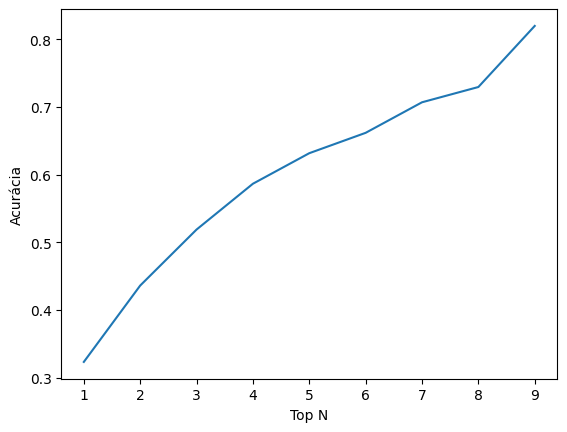

In [10]:
y_axis = []
x_axis = []

for top in range(1, len(arr_table.columns)):
    hit = 0
    for i in range(0, len(arr_table)):
        true_dict = {}
        j = 0
        true_arr_values = arr_table.loc[i].tolist()
        for column in arr_table.columns.tolist():
            true_dict[column] = true_arr_values[j]
            j += 1
        true_dict = sorted(true_dict.items(), key=lambda x:x[1], reverse=True)


        pred_dict = {}
        j = 0
        pred_arr_values = ranking_table.loc[i].tolist()
        for column in ranking_table.columns.tolist():
            pred_dict[column] = pred_arr_values[j]
            j += 1
        pred_dict = sorted(pred_dict.items(), key=lambda x:x[1], reverse=True)

        for top_index in range(0, top):
            if pred_dict[top_index][0] == true_dict[top_index][0]:
                hit += 1
                break

    y_axis.append(hit / len(arr_table))
    x_axis.append(top)

plt.ylabel('Acurácia')
plt.xlabel('Top N')
plt.xticks(x_axis)

plt.plot(x_axis, y_axis)

In [11]:
print(y_axis)

[0.3233082706766917, 0.43609022556390975, 0.518796992481203, 0.5864661654135338, 0.631578947368421, 0.6616541353383458, 0.706766917293233, 0.7293233082706767, 0.8195488721804511]
